Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_65 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_65 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dropout_96 (Dropout)        (None, 5, 5, 64)          0         
                                                                 
 flatten_32 (Flatten)        (None, 1600)            

69/69 [==============================] - 2s 26ms/step - loss: 0.0282 - accuracy: 0.9937 - val_loss: 0.0825 - val_accuracy: 0.9714
Epoch 46/200
69/69 [==============================] - 2s 26ms/step - loss: 0.0198 - accuracy: 0.9959 - val_loss: 0.0739 - val_accuracy: 0.9755
Epoch 47/200
69/69 [==============================] - 2s 29ms/step - loss: 0.0167 - accuracy: 0.9982 - val_loss: 0.0751 - val_accuracy: 0.9714
Epoch 48/200
69/69 [==============================] - 2s 25ms/step - loss: 0.0126 - accuracy: 0.9977 - val_loss: 0.0789 - val_accuracy: 0.9673
Epoch 49/200
69/69 [==============================] - 2s 31ms/step - loss: 0.0185 - accuracy: 0.9964 - val_loss: 0.0733 - val_accuracy: 0.9837
Epoch 50/200
69/69 [==============================] - 2s 27ms/step - loss: 0.0125 - accuracy: 0.9973 - val_loss: 0.0939 - val_accuracy: 0.9755
Epoch 51/200
69/69 [==============================] - 2s 24ms/step - loss: 0.0171 - accuracy: 0.9959 - val_loss: 0.0965 - val_accuracy: 0.9755
Epoch 52/200

69/69 [==============================] - 2s 34ms/step - loss: 7.4159e-04 - accuracy: 1.0000 - val_loss: 0.0952 - val_accuracy: 0.9714
Epoch 103/200
69/69 [==============================] - 2s 28ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.1199 - val_accuracy: 0.9673
Epoch 104/200
69/69 [==============================] - 2s 24ms/step - loss: 3.8474e-04 - accuracy: 1.0000 - val_loss: 0.1291 - val_accuracy: 0.9714
Epoch 105/200
69/69 [==============================] - 2s 28ms/step - loss: 9.2326e-04 - accuracy: 1.0000 - val_loss: 0.1012 - val_accuracy: 0.9714
Epoch 106/200
69/69 [==============================] - 2s 27ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.1181 - val_accuracy: 0.9714
Epoch 107/200
69/69 [==============================] - 2s 25ms/step - loss: 7.2420e-04 - accuracy: 1.0000 - val_loss: 0.0790 - val_accuracy: 0.9755
Epoch 108/200
69/69 [==============================] - 2s 25ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0898 - val_accurac

69/69 [==============================] - 2s 25ms/step - loss: 0.0035 - accuracy: 0.9986 - val_loss: 0.1041 - val_accuracy: 0.9878
Epoch 159/200
69/69 [==============================] - 2s 27ms/step - loss: 0.0039 - accuracy: 0.9982 - val_loss: 0.1671 - val_accuracy: 0.9796
Epoch 160/200
69/69 [==============================] - 2s 22ms/step - loss: 8.9454e-04 - accuracy: 1.0000 - val_loss: 0.1242 - val_accuracy: 0.9837
Epoch 161/200
69/69 [==============================] - 2s 36ms/step - loss: 2.6932e-04 - accuracy: 1.0000 - val_loss: 0.1263 - val_accuracy: 0.9837
Epoch 162/200
69/69 [==============================] - 3s 36ms/step - loss: 5.9371e-04 - accuracy: 1.0000 - val_loss: 0.0992 - val_accuracy: 0.9878
Epoch 163/200
69/69 [==============================] - 2s 29ms/step - loss: 0.0018 - accuracy: 0.9991 - val_loss: 0.0957 - val_accuracy: 0.9837
Epoch 164/200
69/69 [==============================] - 2s 29ms/step - loss: 4.2328e-04 - accuracy: 0.9995 - val_loss: 0.0940 - val_accurac

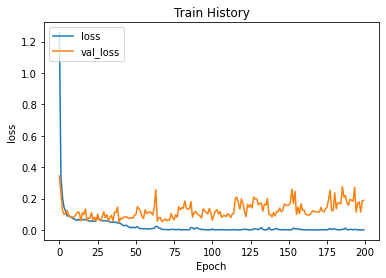

In [104]:
#引入各項需要的lib
import os
import numpy as np
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from matplotlib import pyplot as plt
import sys

def data_x_y_preprocess(datapath):
    img_row, img_col = 28, 28  #圖片大小28*28
    datapath = datapath  #資料路徑
    data_x = np.zeros((28, 28)).reshape(1, 28, 28)  #儲存圖片
    pictureCount = 0  #紀錄圖片數量以便reshape
    data_y = []  #紀錄label
    num_class = 10  #圖片種類有10種
    for root, dirs, files in os.walk(datapath):  #遍歷所有路境內的檔案
        if(".DS_Store" in files):#因為mac出現隱藏檔 所以跳過.DS_Store
            continue
        #print(root)
        for f in files:  #找出檔案
            #print(f)
            label = int(root.split("/")[-1])  #取得label
            data_y.append(label)  #將label放入data_y
            fullpath = os.path.join(root, f)  #求出正確的fullpath
            img = Image.open(fullpath)  #開啟照片
            img = (np.array(img) / 255).reshape(1, 28, 28)  #讀出照片並且做正規化reshape
            data_x = np.vstack((data_x, img))  #處理完成後加入data_x
            pictureCount += 1  #count +1
    data_x = np.delete(data_x, [0], 0)  #delete np.zeros
    data_x = data_x.reshape(pictureCount, img_row, img_col, 1)  #reshape （圖片張數，img_row, img_col, 色彩通道（灰階））
    data_y = np_utils.to_categorical(data_y, num_class)  #將label轉成one-hot encoding
    return data_x, data_y  #回傳處理好的資料


#從train_image資料夾取得資料
datapath='./handwrite__detect/train_image'
data_X, data_Y = data_x_y_preprocess(datapath)

#從test_image資料夾取得資料
datapath='./handwrite__detect/test_image'
data_test_X, data_test_Y = data_x_y_preprocess(datapath)
    
model = Sequential()  #線性執行模型

#建立卷基層，filters數目32，kernel_size=3*3，並且使用relu，且加入第一層卷積層時要有input shape
model.add(
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))  #建立池化層，大小2*2，maxpooling

#建立卷基層，filtersj數目64，kernel_size=3*3，使用relu
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))  #建立池化層，大小2*2，maxpooling

model.add(Dropout(0.1))  #prevent from overfitting，隨機Dropout神經元，斷開比例0.1
model.add(Flatten())  #使用Flatten將2D輸入成1D，使用於卷積層道全連接層的過度
model.add(Dropout(0.1))  #prevent from overfitting，隨機Dropout神經元，斷開比例0.1
model.add(Dense(128, activation='relu'))  #建立全連階層，128個輸出，使用relu
model.add(Dropout(0.25))  #prevent from overfitting，隨機Dropout神經元，斷開比例0.25
model.add(Dense(units=10, activation='softmax'))  #建立全連階層，10個輸出，並且使用softmax，將ouput轉換到[0,1]間

model.summary()  

#建立模型後，將模型進行編譯，選擇損失函數、優化方式及成效衡量方式
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

#訓練過程，訓練資料集，訓練資料的label 儲存於train_history之中，且200次的訓練次數，用0.1的驗證集資料比例做檢查監視
train_history = model.fit(data_X,
                          data_Y,
                          batch_size=16,
                          epochs=200,
                          verbose=1,
                          validation_split=0.1)



#顯示損失函數，個階段訓練成果
score = model.evaluate(data_test_X, data_test_Y, verbose=0)
print('Test loss:', score[0])  #輸出Test loss
print('Test accuracy:', score[1])  #輸出Test accuracy

#優化訓練曲線
plt.plot(train_history.history['loss'])  #輸出訓練過程中的loss
plt.plot(train_history.history['val_loss'])  #輸出訓練過程中的val_loss
plt.title('Train History')  #圖片title
plt.ylabel('loss')  #圖片ylabel
plt.xlabel('Epoch')  #圖片xlabel
plt.legend(['loss', 'val_loss'], loc='upper left')  #左上角圖片圖例
plt.show()  #圖片輸出